# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [2]:
# Your code here
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

df = pd.read_csv('BostonHousing.csv')


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
print(df.head())
print(df.info())
print(df.describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad       

In [ ]:
# Record your observations here 
Clean dataset. Most neighborhoos have houses 70 yearqs old. average of 6 beds per house which seems high. 

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

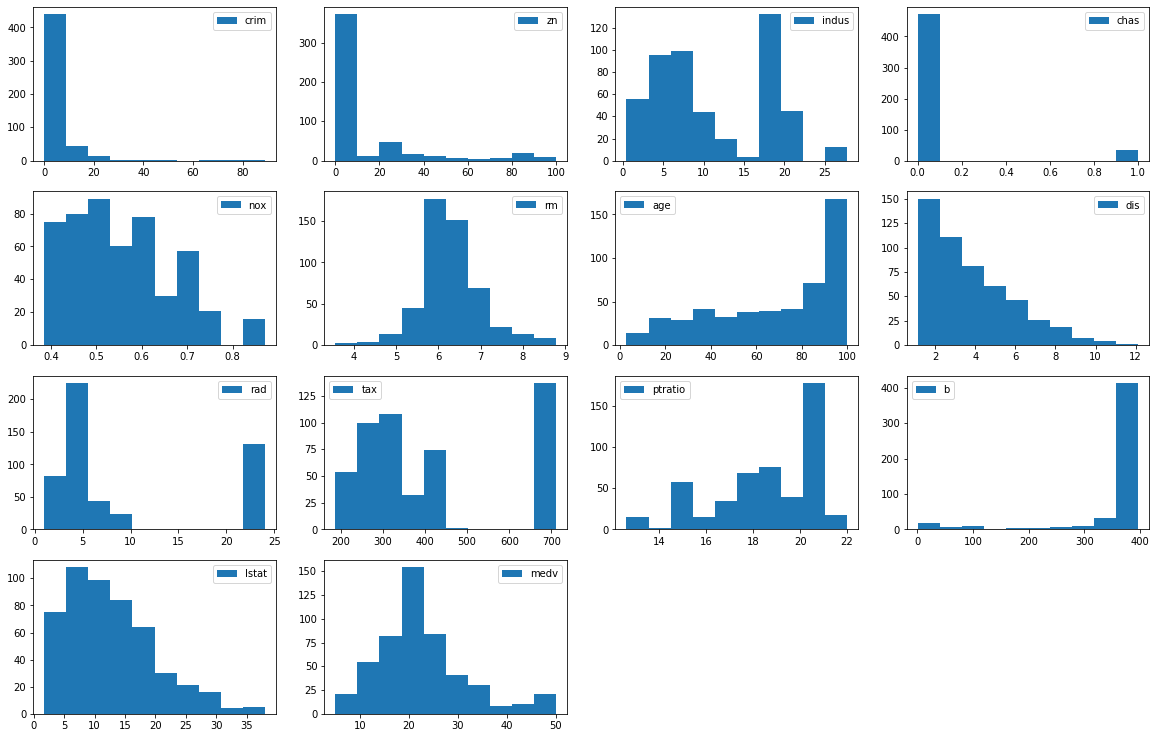

In [18]:

i = 1
plt.figure(figsize=(20,13))
for col in df.columns:
    plt.subplot(4,4,i)
    plt.hist(df[col])
    plt.legend([col])
    i+=1
    

plt.show()

In [116]:
# You observations here 
# looks like theres a lot of old houes and few new ones makes sens egiven how old boston is
# number of rooms is normall distributed. makes sense that your less likely to fins houes very very few or very many rooms
#seems like most neighborhoods are close to employment zones, and the number tapers down. probably because housing is denser closer 
#city centers and gets lower as you go out. 


Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [19]:
cols = ['crim', 'dis', 'rm', 'zn', 'age', 'medv']
df2 = df.loc[:,cols]
print (df2.head())

      crim     dis     rm    zn   age  medv
0  0.00632  4.0900  6.575  18.0  65.2  24.0
1  0.02731  4.9671  6.421   0.0  78.9  21.6
2  0.02729  4.9671  7.185   0.0  61.1  34.7
3  0.03237  6.0622  6.998   0.0  45.8  33.4
4  0.06905  6.0622  7.147   0.0  54.2  36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

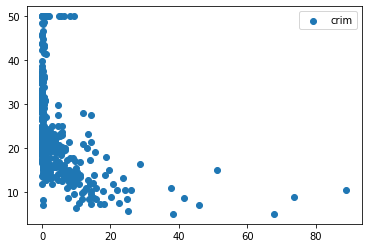

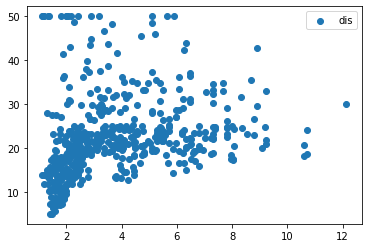

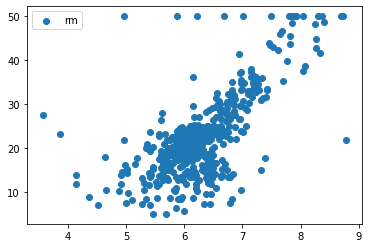

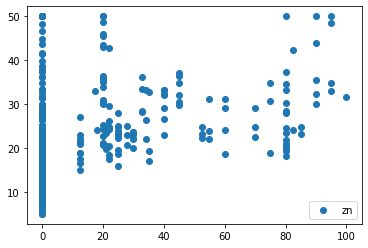

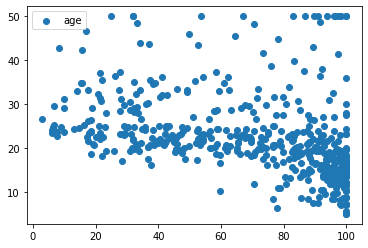

In [22]:
for col in df2.columns:
    if col != 'medv':
        plt.figure()
        plt.scatter(df2[col],df2['medv'])
        plt.legend([col])
        
plt.show()

    

In [ ]:
# Your observations here 
#number of rooms seems to have the most direct lienar relationship with median values, after accounting for outliers
# crim and medv seem to be inevrsely related somewhat linearly
# medv seems to be lower if distance to employmenr centers is less
#theres alot of neighborhood with no lond zoned for lots over 25k, but otherwise the more land zoned for lots over 25 k the higher the med value



Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

<Figure size 432x288 with 0 Axes>

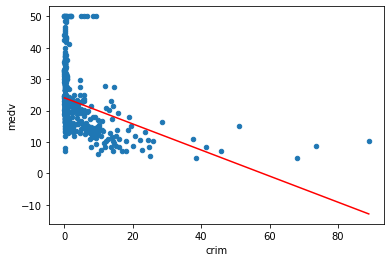

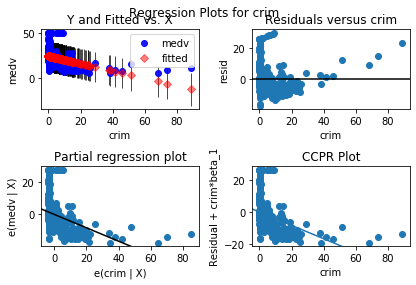

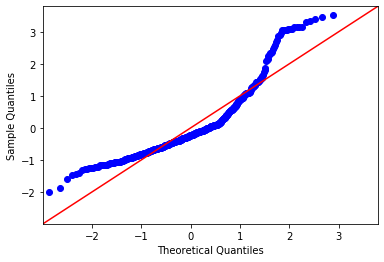

<Figure size 432x288 with 0 Axes>

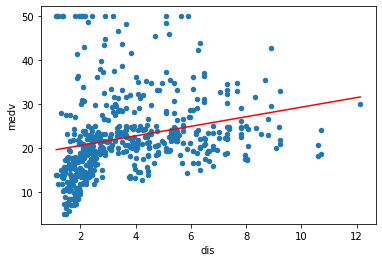

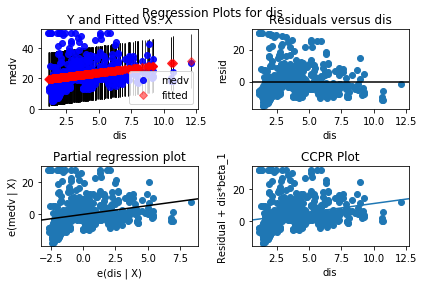

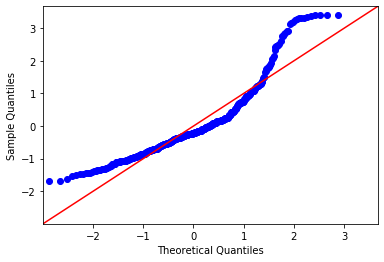

<Figure size 432x288 with 0 Axes>

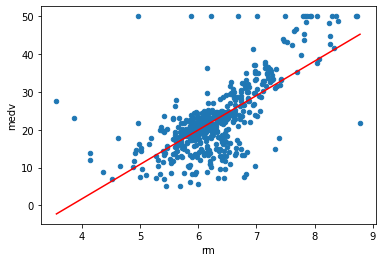

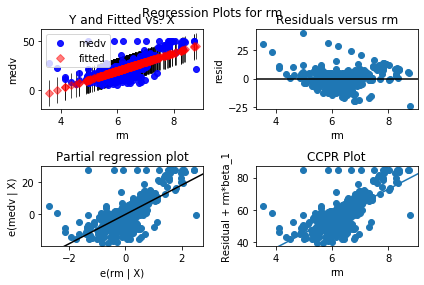

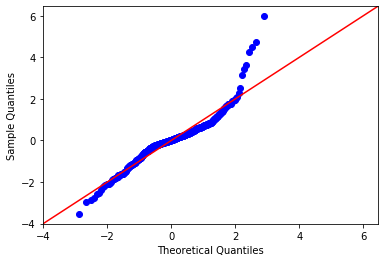

<Figure size 432x288 with 0 Axes>

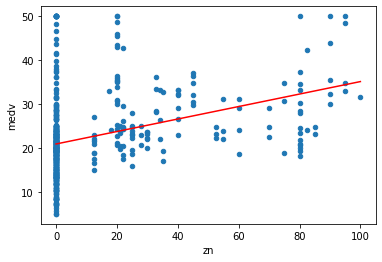

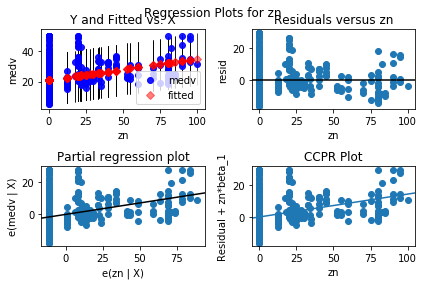

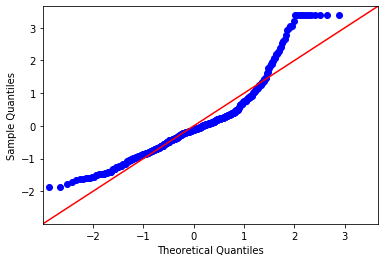

<Figure size 432x288 with 0 Axes>

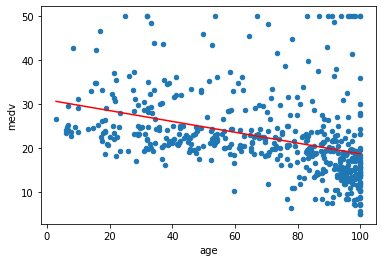

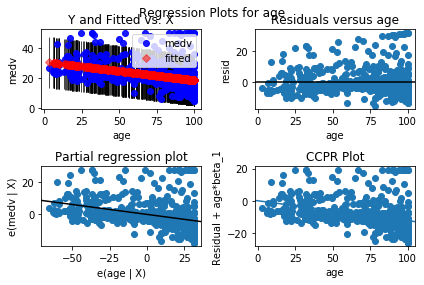

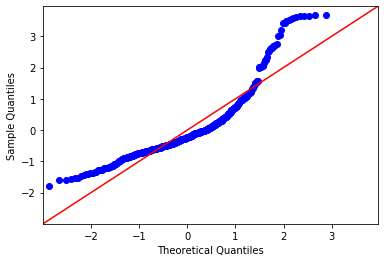

In [55]:
# Your code here
results = [['ind_var','r_squared','intercept','slope','p-value','normality(JB)']]
import scipy.stats as stats
import statsmodels.stats.api as sms

for col in df2.columns:
    if col != 'medv':
        f= 'medv~{}'.format(col)
        model = ols(formula=f,data=df2).fit()
        
        X_new = pd.DataFrame({col:[df2[col].min(),df2[col].max()]})
        preds = model.predict(X_new)
        
        plt.figure()
        df2.plot(kind='scatter',x=col,y='medv')
        plt.plot(X_new,preds,c='red')
        
        
    
        fig = plt.figure()
        fig = sm.graphics.plot_regress_exog(model,col,fig=fig)
        
        residuals = model.resid
        fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        
        diag = []
        diag.append(model.rsquared)
        
        
        results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
        
        
        fig.show()
        
        

In [56]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality(JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [118]:
#Your observations here 
#Number of rooms def has the highest co-rellation to median value. 
# The residuals of none of the variables are very normaly distributed base on JB values. 



Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.

In [79]:
print(df['medv'].value_counts())
df3 = df2[df2['medv'] != 50]
print(df3.info())
print(df2['medv'].max())

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: medv, Length: 229, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 6 columns):
crim    490 non-null float64
dis     490 non-null float64
rm      490 non-null float64
zn      490 non-null float64
age     490 non-null float64
medv    490 non-null float64
dtypes: float64(6)
memory usage: 26.8 KB
None
50.0


<Figure size 432x288 with 0 Axes>

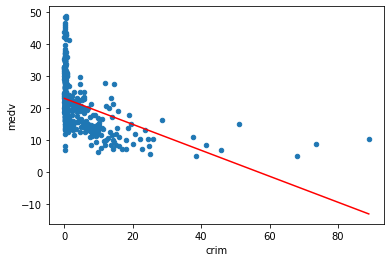

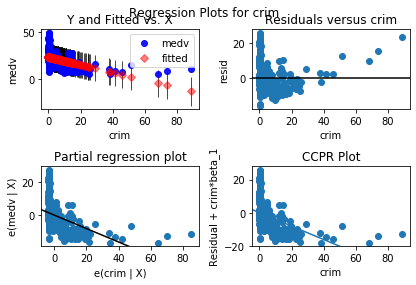

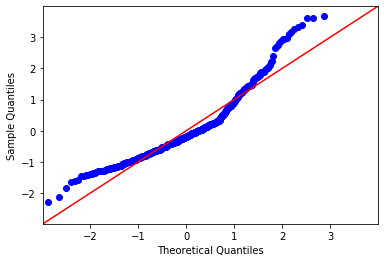

<Figure size 432x288 with 0 Axes>

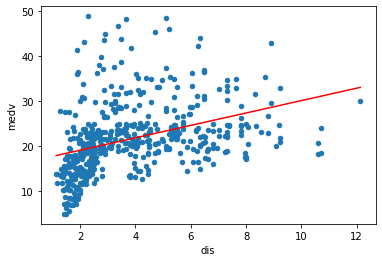

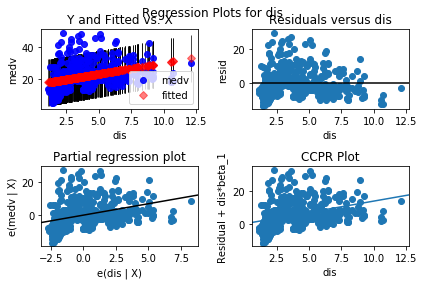

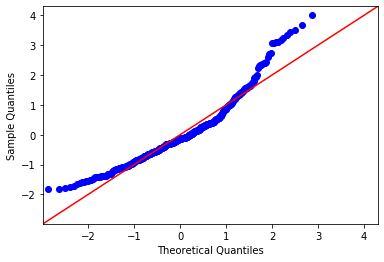

<Figure size 432x288 with 0 Axes>

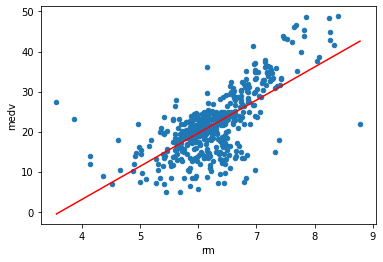

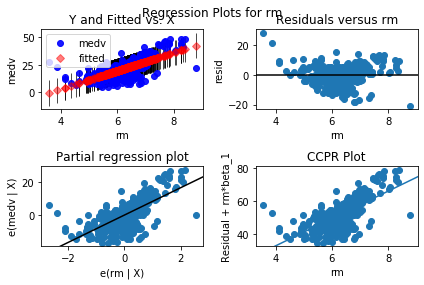

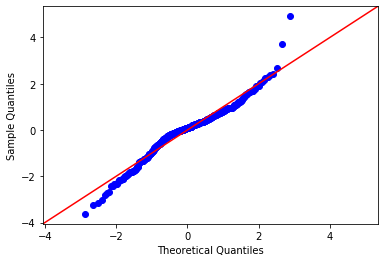

<Figure size 432x288 with 0 Axes>

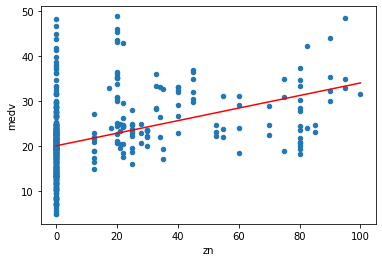

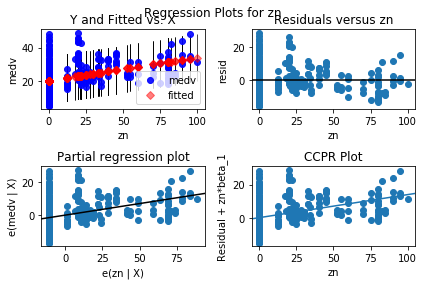

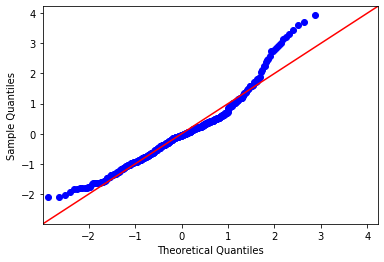

<Figure size 432x288 with 0 Axes>

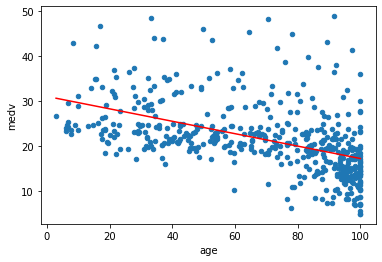

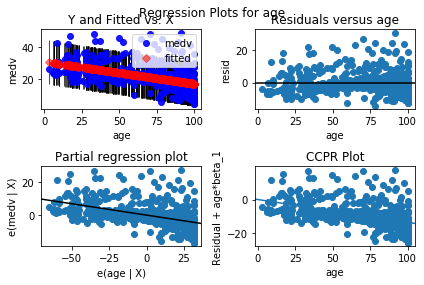

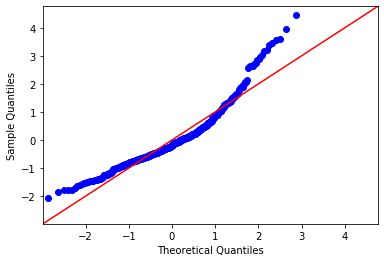

In [77]:
results2 = [['ind_var','r_squared','intercept','slope','p-value','normality(JB)']]
import scipy.stats as stats
import statsmodels.stats.api as sms

for col in df3.columns:
    if col != 'medv':
        f= 'medv~{}'.format(col)
        model = ols(formula=f,data=df3).fit()
        
        X_new = pd.DataFrame({col:[df3[col].min(),df3[col].max()]})
        preds = model.predict(X_new)
        
        plt.figure()
        df3.plot(kind='scatter',x=col,y='medv')
        plt.plot(X_new,preds,c='red')
        
        
    
        fig = plt.figure()
        fig = sm.graphics.plot_regress_exog(model,col,fig=fig)
        
        residuals = model.resid
        fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        
        diag = []
        diag.append(model.rsquared)
        
        
        results2.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
        
        
        fig.show()
        
        

In [78]:
pd.DataFrame(results2)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality(JB)
1,crim,0.202604,23.1147,-0.405896,8.11474e-26,170.962
2,dis,0.136023,16.3641,1.37483,3.10281e-17,168.179
3,rm,0.471467,-30.0051,8.26856,1.41076e-69,90.0397
4,zn,0.163707,20.0879,0.139305,1.00341e-20,119.098
5,age,0.242965,31.0346,-0.137652,2.32409e-31,249.19


# INDEPENDANT ANALYSIS
Pulling the value counts of the medv column showed an unusally large numebr of median values listed at 50k.
IT also seems 50 is the maximum value in that column. It seem highly unlikely that no nieghborhoods around boston have median houe prices higher than $50,000. Its more probable that $50k is the placeholder value assigned to median values for neighborhoods whose actual median value of housing is $50k or higher. This is borne out by the previous set of charts where we could consistently see a cluster of points upa t the very top of the chart at its peak range (50). Treating 50 k as an outlier,
I decided to remove all rows from the dataframe where the median value was 50k. Re fitting the model to this new data frame showed significant improvement across all independant variables. The JB values have gone down considerably, and the r_squared values have gone up. 